## 1. Historical

[*********************100%***********************]  1 of 1 completed


Historical VaR (95% confidence level): -3.48%


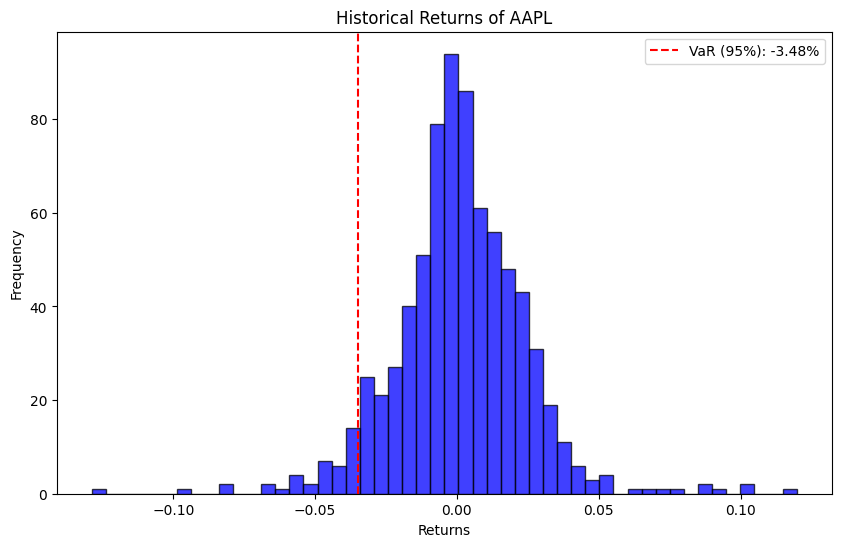

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical data for a stock
data = yf.download("AAPL", start="2020-01-01", end="2023-01-01")
returns = data['Adj Close'].pct_change().dropna()

# Calculate the historical VaR at 95% confidence level
confidence_level = 0.95
VaR_historical = np.percentile(returns, (1 - confidence_level) * 100)

print(f"Historical VaR (95% confidence level): {VaR_historical:.2%}")

# Plot the historical returns and VaR threshold
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.axvline(VaR_historical, color='red', linestyle='--', label=f'VaR (95%): {VaR_historical:.2%}')
plt.title('Historical Returns of AAPL')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## 2. Variance-Covariance Method Example

In [5]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

# Fetch historical data for a stock
data = yf.download("AAPL", start="2020-01-01", end="2023-01-01")
returns = data['Adj Close'].pct_change().dropna()

# Calculate the mean and standard deviation of returns
mean_return = np.mean(returns)
std_dev = np.std(returns)

# Calculate the VaR at 95% confidence level using the Z-score
confidence_level = 0.95
z_score = norm.ppf(1 - confidence_level)
VaR_variance_covariance = mean_return + z_score * std_dev

print(f"Variance-Covariance VaR (95% confidence level): {VaR_variance_covariance:.2%}")

# Plot the normal distribution and VaR threshold
plt.figure(figsize=(10, 6))
x = np.linspace(mean_return - 3*std_dev, mean_return + 3*std_dev, 1000)
y = norm.pdf(x, mean_return, std_dev)
plt.plot(x, y, label='Normal Distribution')
plt.axvline(VaR_variance_covariance, color='red', linestyle='--', label=f'VaR (95%): {VaR_variance_covariance:.2%}')
plt.fill_between(x, 0, y, where=(x <= VaR_variance_covariance), color='red', alpha=0.5)
plt.title('Normal Distribution of Returns with VaR Threshold')
plt.xlabel('Returns')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


TypeError: unsupported format string passed to Series.__format__

## 3. Monte Carlo Simulation Example

[*********************100%***********************]  1 of 1 completed
/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Monte Carlo VaR (95% confidence level): -29.01%


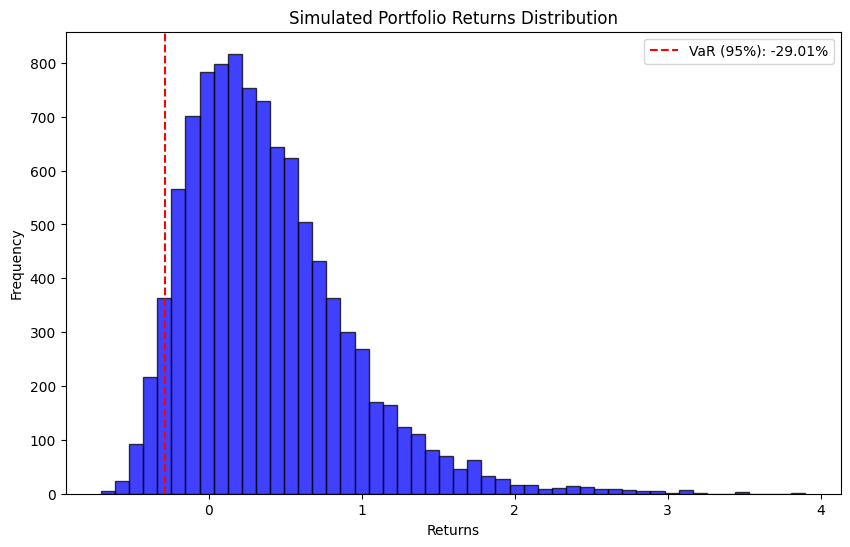

In [4]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical data for a stock
data = yf.download("AAPL", start="2020-01-01", end="2023-01-01")
returns = data['Adj Close'].pct_change().dropna()

# Simulate future returns using Monte Carlo
num_simulations = 10000
simulation_horizon = 252  # Number of trading days in a year
simulated_returns = np.random.normal(np.mean(returns), np.std(returns), (simulation_horizon, num_simulations))

# Calculate the simulated portfolio values
initial_investment = 1000000  # $1,000,000
portfolio_values = initial_investment * np.exp(np.cumsum(simulated_returns, axis=0))

# Calculate the portfolio returns
portfolio_returns = portfolio_values[-1] / portfolio_values[0] - 1

# Calculate the VaR at 95% confidence level
confidence_level = 0.95
VaR_monte_carlo = np.percentile(portfolio_returns, (1 - confidence_level) * 100)

print(f"Monte Carlo VaR (95% confidence level): {VaR_monte_carlo:.2%}")

# Plot the distribution of simulated portfolio returns and VaR threshold
plt.figure(figsize=(10, 6))
plt.hist(portfolio_returns, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.axvline(VaR_monte_carlo, color='red', linestyle='--', label=f'VaR (95%): {VaR_monte_carlo:.2%}')
plt.title('Simulated Portfolio Returns Distribution')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()